In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.datasets import imdb

In [10]:
layer = layers.Dense(32, input_shape = (728,))

In [14]:
model1 = models.Sequential()
model1.add(layers.Dense(32, activation = 'relu', input_shape = (728,)))
model1.add(layers.Dense(10, activation = 'softmax'))

In [15]:
input_ = layers.Input(shape = (728,))
hidden_ = layers.Dense(32, activation = 'relu')
output_ = layers.Dense(10, activation = 'softmax')

model2 = models.Model(inputs = [input_], outputs = [output_(hidden_(input_))])

In [16]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                23328     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 23,658
Trainable params: 23,658
Non-trainable params: 0
_________________________________________________________________


In [17]:
model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 728)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                23328     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 23,658
Trainable params: 23,658
Non-trainable params: 0
_________________________________________________________________


In [19]:
model = model1

In [20]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
              loss = 'mse',
              metrics = ['accuracy'])

In [21]:
model.fit(x = X_train, y = y_train, validation_data = (X_valid, y_valid),
          batch_size = 128, epochs = 10)

NameError: name 'X_train' is not defined

In [39]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
print(train_labels.shape)
print(test_labels.shape)

(25000,)
(25000,)


In [8]:
print(train_data[0])
print(train_labels)
print(max([max(datum) for datum in train_data]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1 0 0 ... 0 1 0]
9999


In [29]:
words = imdb.get_word_index()
dictionary = {}
for word in words.keys():
    dictionary[words[word]] = word

In [34]:
for n in train_data[0]:
    print(dictionary[n], end = ' ')

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [50]:
X_train_full = np.zeros((25_000, 10_000))

for i in range(25_000):
    for j in train_data[i]:
        X_train_full[i][j] = 1
    
print(X_train_full)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [46]:
X_test = np.zeros((25_000, 10_000))

for i in range(25_000):
    for j in test_data[i]:
        X_test[i][j] = 1
    
print(X_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [54]:
y_train_full, y_test = train_labels, test_labels

In [63]:
model = models.Sequential([
    layers.Dense(16, activation = 'relu', input_shape = (10_000,)),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [64]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [65]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, 
                                                      test_size = 5_000, random_state = 0)

In [66]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid),
          batch_size = 528, epochs = 10)

Epoch 1/10
38/38 [==============================] - 1s 15ms/step - loss: 0.5534 - accuracy: 0.7698 - val_loss: 0.3852 - val_accuracy: 0.8686
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.2935 - accuracy: 0.8987 - val_loss: 0.2785 - val_accuracy: 0.8944
Epoch 3/10
38/38 [==============================] - 0s 8ms/step - loss: 0.2018 - accuracy: 0.9288 - val_loss: 0.2662 - val_accuracy: 0.8958
Epoch 4/10
38/38 [==============================] - 0s 9ms/step - loss: 0.1569 - accuracy: 0.9471 - val_loss: 0.2736 - val_accuracy: 0.8944
Epoch 5/10
38/38 [==============================] - 0s 9ms/step - loss: 0.1256 - accuracy: 0.9606 - val_loss: 0.2898 - val_accuracy: 0.8920
Epoch 6/10
38/38 [==============================] - 0s 9ms/step - loss: 0.1017 - accuracy: 0.9705 - val_loss: 0.3055 - val_accuracy: 0.8892
Epoch 7/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0829 - accuracy: 0.9780 - val_loss: 0.3290 - val_accuracy: 0.8870
Epoch 8/10
38/38 [=

In [67]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 0s 608us/step - loss: 0.4851 - accuracy: 0.8606


[0.48507100343704224, 0.8606399893760681]

In [90]:
# print(history.history)
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


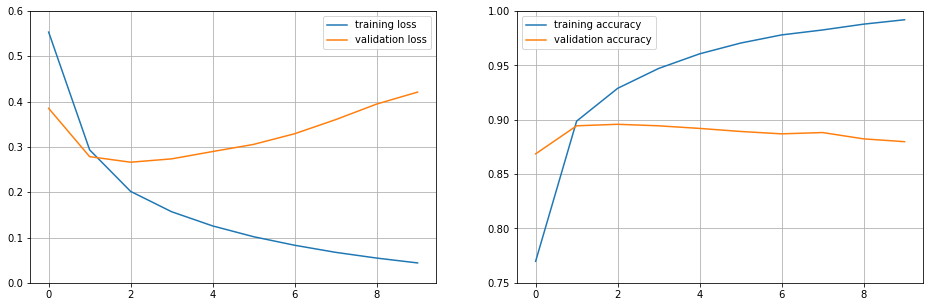

In [94]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

ax[0].plot(history.history['loss'], label = 'training loss')
ax[0].plot(history.history['val_loss'], label = 'validation loss')
ax[0].set_ylim([0, 0.6])
ax[0].grid(); ax[0].legend()

ax[1].plot(history.history['accuracy'], label = 'training accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'validation accuracy')
ax[1].set_ylim([0.75, 1.0])
ax[1].grid(); ax[1].legend()

plt.show()

In [115]:
def train_model(no_of_layers = 2, no_hidden_units = 16, activation = 'relu', loss = 'binary_crossentropy'):
    
    model = models.Sequential()
    
    model.add(layers.Input(shape = (10_000,)))

    for i in range(no_of_layers):
        model.add(layers.Dense(no_hidden_units, activation = activation))
    
    model.add(layers.Dense(1, activation = 'sigmoid'))

    model.compile(loss = loss,
                  optimizer = 'adam',
                  metrics = ['accuracy'])

    history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid),
              batch_size = 528, epochs = 10, verbose = 0)
    
    return model, history
    
def plot_history(history, title):
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))

    ax[0].plot(history.history['loss'], label = 'training loss')
    ax[0].plot(history.history['val_loss'], label = 'validation loss')
    ax[0].set_ylim([0, 0.6])
    ax[0].grid(); ax[0].legend()
    ax[0].set_title(title)

    ax[1].plot(history.history['accuracy'], label = 'training accuracy')
    ax[1].plot(history.history['val_accuracy'], label = 'validation accuracy')
    ax[1].set_ylim([0.75, 1.0])
    ax[1].grid(); ax[1].legend()
    ax[1].set_title(title)

    plt.show()

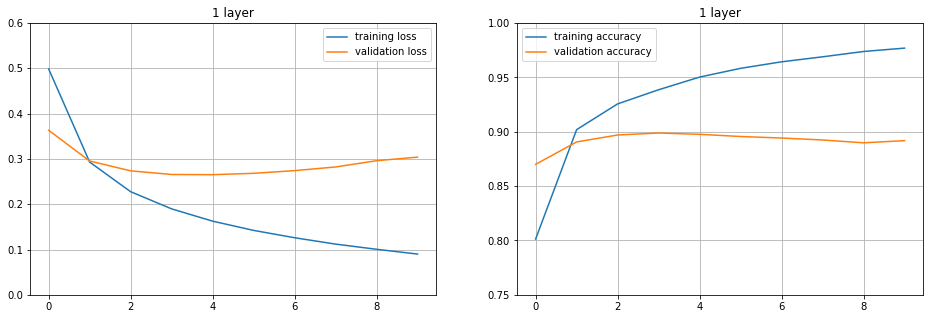

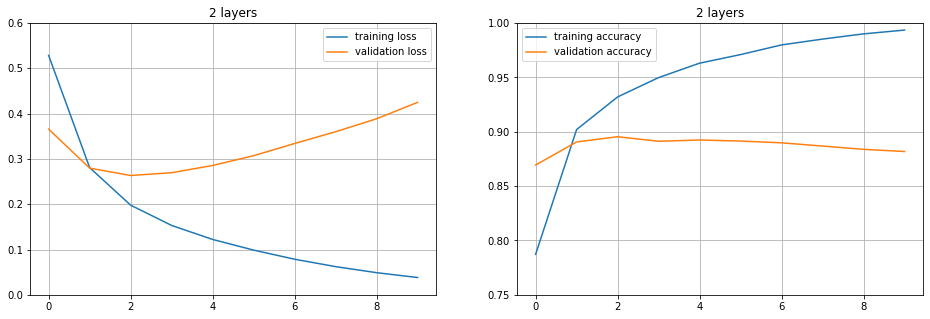

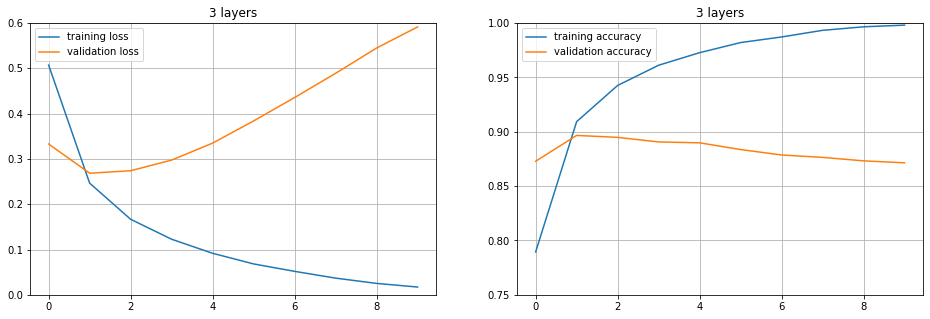

In [116]:
plot_history(train_model(no_of_layers = 1)[1], '1 layer')
plot_history(train_model(no_of_layers = 2)[1], '2 layers')
plot_history(train_model(no_of_layers = 3)[1], '3 layers')

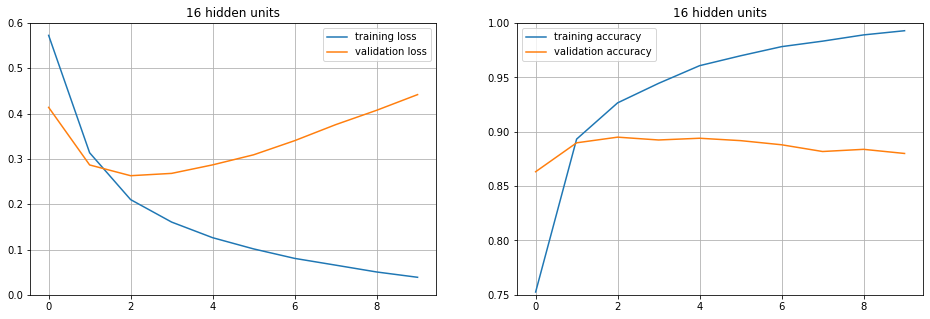

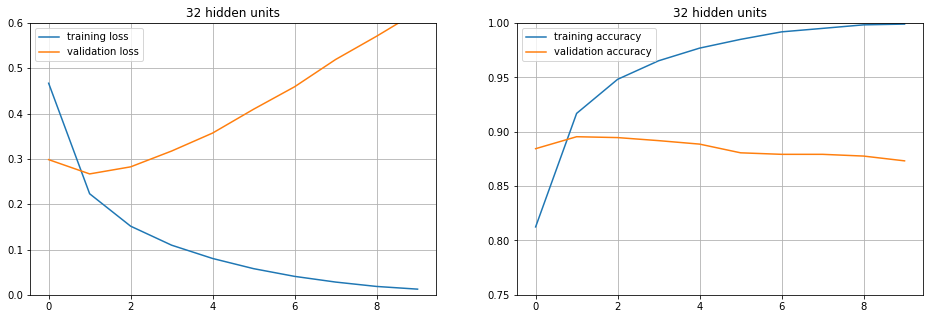

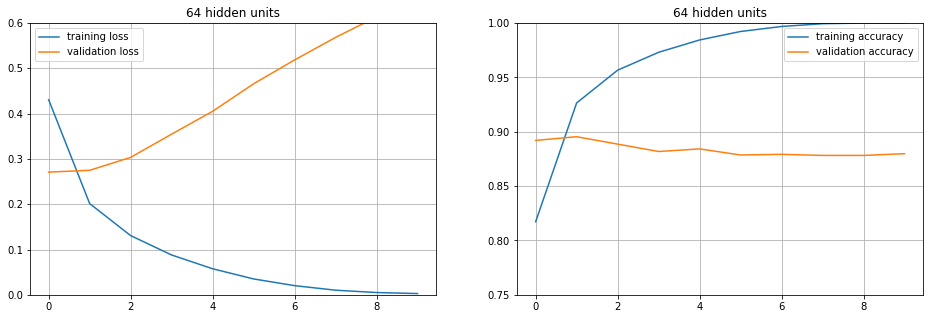

In [117]:
plot_history(train_model(no_hidden_units = 16)[1], '16 hidden units')
plot_history(train_model(no_hidden_units = 32)[1], '32 hidden units')
plot_history(train_model(no_hidden_units = 64)[1], '64 hidden units')

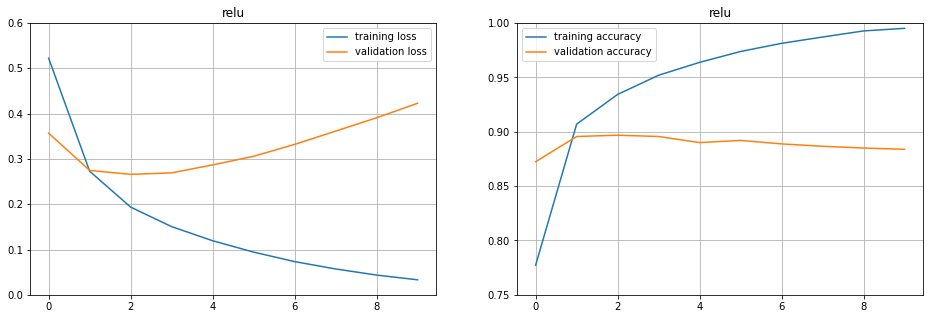

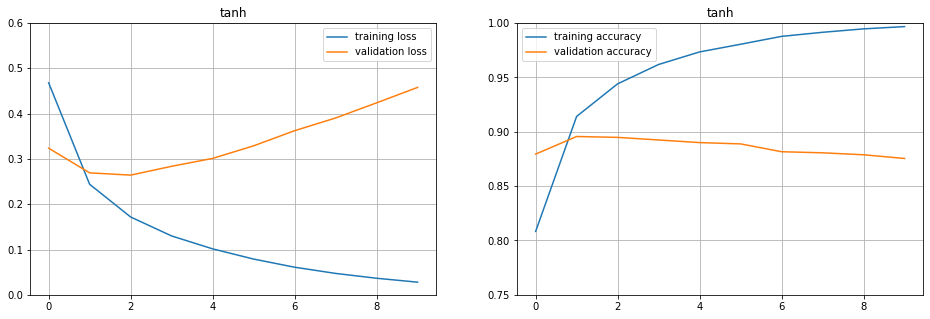

In [118]:
plot_history(train_model(activation = 'relu')[1], 'relu')
plot_history(train_model(activation = 'tanh')[1], 'tanh')

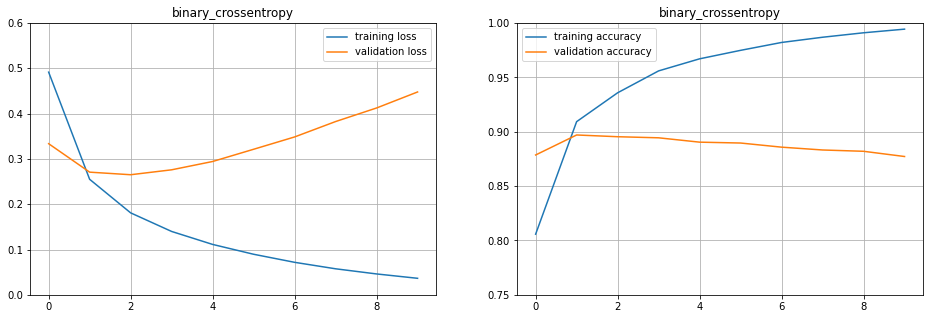

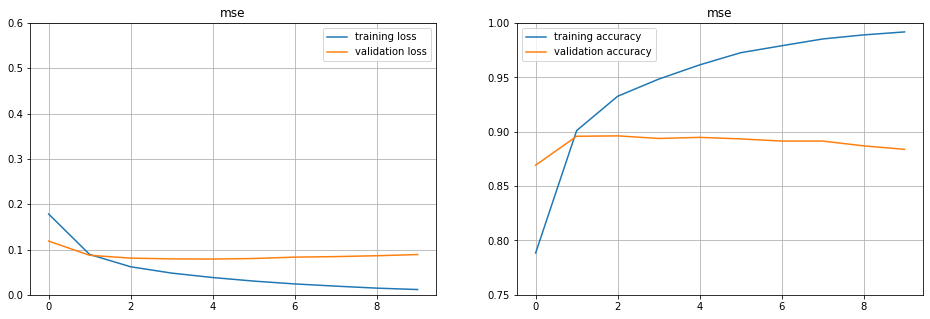

In [119]:
plot_history(train_model(loss = 'binary_crossentropy')[1], 'binary_crossentropy')
plot_history(train_model(loss = 'mse')[1], 'mse')